$g)$ Remove the edges (d,a),(d,c),(a,c),(b,c). Describe and motivate the asymptotic behaviour
of the dynamics. If the dynamics converges to an asymptotic state, how is such a state related
to the initial condition $x(0)$?

In [4]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import choice, rand
%matplotlib inline
options = {
    'node_size': 500,
    'width': 1, # width of the edges,
    'node_color': '#ffffff',
    'node_shape': 'o',
    'edge_color': 'black',
    'font_weight':'normal'
}

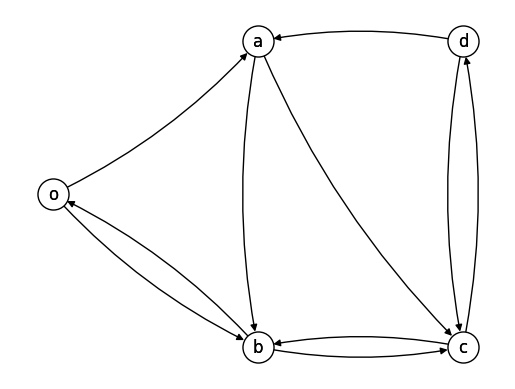

In [5]:
#defining and printing the give graph
V = ['o', 'a', 'b', 'c', 'd']
E = [('o','a'), ('o','b'), ('a','b'), ('a','c'), ('b','c'), ('b','o'),
         ('c','b'), ('c','d'), ('d','a'), ('d','c')]

G = nx.DiGraph()
G.add_nodes_from(V)
G.add_edges_from(E)
pos = {'o': (40, 20), 'a': (60, 35), 'b': (60, 5), 'c':(80,5), 'd': (80, 35)}
node_list = list(G.nodes())


plt.subplot(111)
#nx.draw_networkx_nodes(G, pos, node_color=options['node_color'], node_size=options['node_size'],)
#nx.draw_networkx_edges(G, pos, arrows=True, arrowsize=20, min_source_margin=16, min_target_margin=16)
nx.draw(G, pos, with_labels=True, **options, connectionstyle="arc3,rad=0.1")
nx.draw_networkx_labels(G, pos)
ax= plt.gca()
ax.collections[0].set_edgecolor("black")

In [6]:
# Defining Lambda
Lambda = np.array([
     [0, 2/5, 1/5, 0, 0],
     [0, 0, 3/4, 1/4, 0],
     [1/2, 0, 0, 1/3, 0],
     [0, 0, 1/3, 0, 2/3],
     [0, 1/2, 0, 1/3, 0]
])

# From here starts

In [7]:
def removeEdge(edge, W, nodes):
    start = nodes.index(edge[0])
    end = nodes.index(edge[1])
    print(W[start,end],"->",0)
    W[start,end] = 0
    return W

In [8]:
W1 = Lambda.copy()
#Removing (d,a)
W1 = removeEdge(('d','a'), W1, node_list)
#Removing (d,c)
W1 = removeEdge(('d','c'), W1, node_list)
#Removing (a,c)
W1 = removeEdge(('a','c'), W1, node_list)
#Removing (b,c) 
W1 = removeEdge(('b','c'), W1, node_list)


0.5 -> 0
0.3333333333333333 -> 0
0.25 -> 0
0.3333333333333333 -> 0


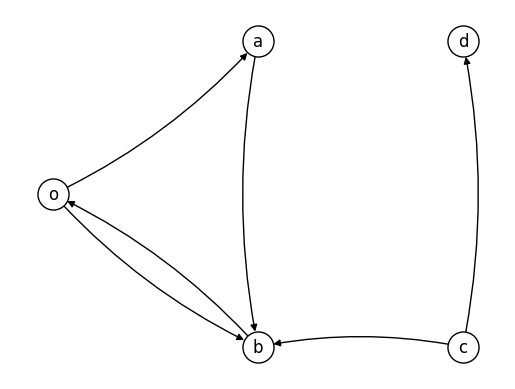

In [9]:
#Updating the graph
G1 = nx.from_numpy_array(W1, parallel_edges=True, create_using=nx.DiGraph)
mapping = {
    0:'o',
    1:'a',
    2:'b',
    3:'c',
    4:'d'
}
G1 = nx.relabel_nodes(G1, mapping)
plt.subplot(111)
nx.draw(G1, pos,with_labels=True, **options, connectionstyle="arc3,rad=0.1")
ax= plt.gca()
ax.collections[0].set_edgecolor("black")

In [10]:
W1

array([[0.        , 0.4       , 0.2       , 0.        , 0.        ],
       [0.        , 0.        , 0.75      , 0.        , 0.        ],
       [0.5       , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.33333333, 0.        , 0.66666667],
       [0.        , 0.        , 0.        , 0.        , 0.        ]])

As node $d$ has out-degree 0 it is necessary to add a self-loop and update $W1$ 

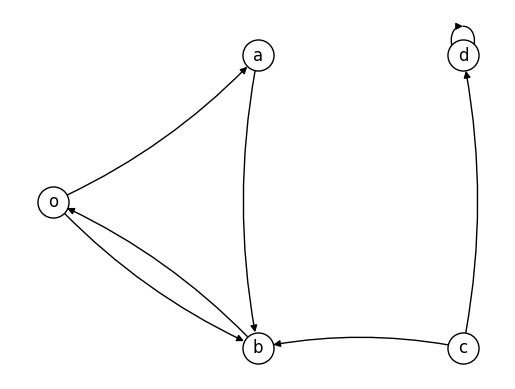

In [11]:
G1.add_edge('d','d')
plt.subplot(111)
nx.draw(G1, pos,with_labels=True, **options, connectionstyle="arc3,rad=0.1")
ax= plt.gca()
ax.collections[0].set_edgecolor("black")

Now d is an absorbent node because its only going out is itself

In [12]:
W1 = nx.adjacency_matrix(G1).toarray()

In [13]:
W1 #Now the las value on the diagonal is different from 0

array([[0.        , 0.4       , 0.2       , 0.        , 0.        ],
       [0.        , 0.        , 0.75      , 0.        , 0.        ],
       [0.5       , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.33333333, 0.        , 0.66666667],
       [0.        , 0.        , 0.        , 0.        , 1.        ]])

In [14]:
degs=np.sum(W1,axis=1)
D1 = np.diag(degs)
P1 = np.linalg.inv(D1) @ W1

In [17]:
P1

array([[0.        , 0.66666667, 0.33333333, 0.        , 0.        ],
       [0.        , 0.        , 1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.33333333, 0.        , 0.66666667],
       [0.        , 0.        , 0.        , 0.        , 1.        ]])

In [15]:
#Compute consensus with the eigenvector method
def consensus(P,x0):
    values,vectors = np.linalg.eig(P.T)

    # selects the eigenvalue 1 and print the eigenvector
    for index in [i for i in range(P.shape[0]) if np.isclose(values[i],1)]:
        pi = vectors[:,index].real  # -> eigenvectors are complex but pi is real, so we convert it to real
        pi = pi/np.sum(pi)

    #found pi, we have to multiply by the initial condition
    return x0, pi@x0

Simulation of the dynamic evolution

In [23]:
#Simulating the dynamic evolution
x0 = [20,0,0,0,1]
x=x0
n_iter = 100
for n in range(n_iter):
    #n_iter from previous dynamics
    x = P1 @ x
initial, value = consensus(P1, x0)
print("Consensus value:", value)
print("Initial state:", x0)
print("Empirical consensus value:", x.mean())
print()

Consensus value: 1.0
Initial state: [20, 0, 0, 0, 1]
Empirical consensus value: 5.333333334651733



In [24]:
x0 = [50,2,32,1,0]
x=x0
n_iter = 100
for n in range(n_iter):
    #n_iter from previous dynamics
    x = P1 @ x
initial, value = consensus(P1, x0)
print("Consensus value:", value)
print("Initial state:", x0)
print("Empirical consensus value:", x.mean())
print()

Consensus value: 0.0
Initial state: [50, 2, 32, 1, 0]
Empirical consensus value: 20.833333339131975



In [ ]:
n_iter = 100
x0 = np.random.rand(G1.number_of_nodes())
x=x0
for n in range(n_iter): #n_iter from previous dynamics
    x = P1 @ x
initial, value = consensus(P1, x0)
print("Consensus value:", value)
print("Initial state:", x0)
print("Empirical consensus value:", x.mean())
print()

Consensus value: 0.2916205491004459
Initial state: [0.25237548 0.82272331 0.6870637  0.02862626 0.29162055]
Empirical consensus value: 0.4691871954278174



As d is an absorbent node at the end the real consensus value will be the value in that node at the begining $x(0)$